## numpy-tensor-image之间的关系和转换
在学习transforms的时候,突然想仔细了解一下经过预处理的图像是怎样的. 不如进一步把相关的概念都梳理一下.  
首先是三种数据的介绍(by ChatGPT):
- numpy数组:NumPy 是 Python 中用于科学计算的一个核心库，它提供了多维数组对象和各种数学函数来操作这些数组。NumPy 数组在数据处理、预处理和分析中被广泛使用。在与 PyTorch 交互时，你可以将数据从 NumPy 数组转换为 Tensor，也可以将 Tensor 转换为 NumPy 数组。
- Tensor张量:在 PyTorch 中，Tensor 是一个多维数组，类似于 NumPy 的多维数组，但具有 GPU 加速的能力。PyTorch 的神经网络模型以及相关操作都是基于 Tensor 进行计算的。你可以将数据加载到 Tensor 中，然后在 GPU 上执行操作以提高计算性能。
- 图像数据:图像是由像素组成的二维或三维数组。在计算机视觉任务中，图像是输入数据，经过神经网络处理后得到输出结果。通常，图像可以使用 PIL（Python Imaging Library）或 OpenCV（Open Source Computer Vision Library）库加载和处理。

关于使用PIL库和使用OpenCV库的区别:
1. PIL库是将图片处理成自己的"Image"类型的数据, 而OpenCV是将图片处理成numpy数组来操作数据.
2. 通道顺序不同: Image数据类型采用RGB排列,而OpenCV采用BGR排列

两个库都需要转换成Tensor才能用pytorch中的transforms处理.  

## 图片的展示
图片可以使用matplotlib库来展示.  
对于PIL库, 可以直接使用`plt.imshow(image)`来展示图片,其中'image'是PIL库的Image对象.  
对于openCV库, 也可以使用`plt.imshow(image)`来展示图片, 不过在展示之前, 需要使用`image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`来将opencv的图像对象转换成RGB顺序.


<class 'PIL.JpegImagePlugin.JpegImageFile'>


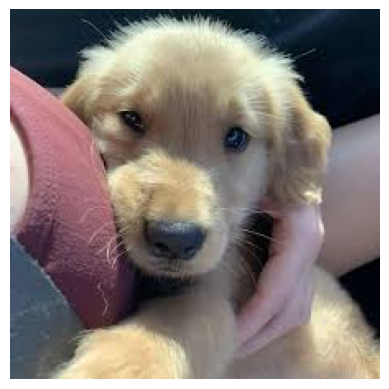

In [25]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# 读取图像
image_path = 'data\Chapter3\doge.jpg'
image = Image.open(image_path)
print(type(image))


# 使用 Matplotlib 展示图像
plt.imshow(image)
plt.axis('off')  # 关闭坐标轴
plt.show()


<class 'numpy.ndarray'>


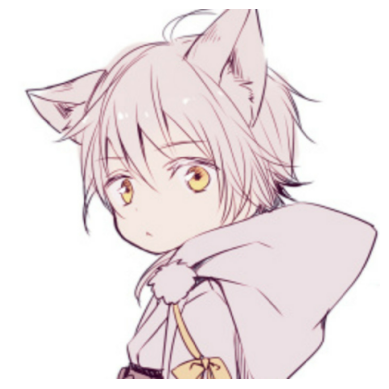

In [26]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
image = None
image_path = 'data\Chapter3\head.png'#经过测试,使用OpenCV加载图片,路径不能有中文
image = cv2.imread(image_path)
print(type(image))
if image is None:
    print("Failed to load the image.")
else:
    # 将 BGR 转换为 RGB，因为 Matplotlib 使用 RGB 顺序
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 使用 Matplotlib 展示图像
    plt.imshow(image_rgb)
    plt.axis('off')  # 关闭坐标轴
    plt.show()


## 图像数据和tensor之间的转换
图像数据要在pytorch中使用必须转换成Tensor类型的数据.  
使用transforms可以将PIL的数据转换成Tensor类型的数据.如果要使用OpenCV加载图像,必须先将OpenCV加载的numpy数组格式的图片数据转换成PIL中的Image对象才能使用transforms来对图像进行预处理.

type(image): <class 'PIL.PngImagePlugin.PngImageFile'>


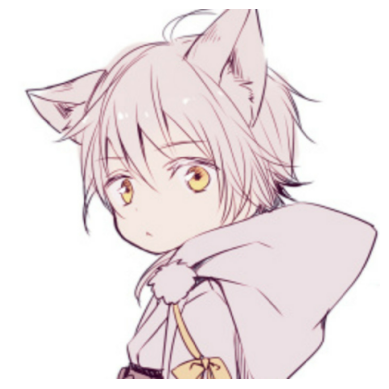

type(image_tensor): <class 'torch.Tensor'>
<class 'PIL.Image.Image'>


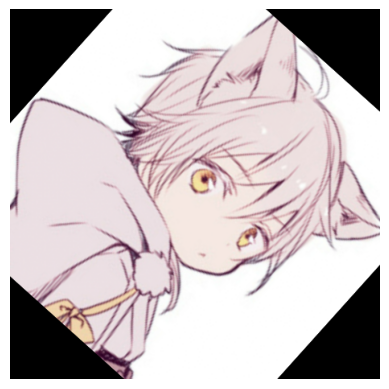

In [46]:
from PIL import Image
import cv2
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

image_path = 'data\Chapter3\head.png'
image = Image.open(image_path)
#定义transforms
process = transforms.Compose(
    [transforms.Resize((460,460)),
    transforms.ToTensor(),
    transforms.RandomRotation(45, interpolation=transforms.InterpolationMode.BILINEAR, expand=False, center=None),
    transforms.RandomHorizontalFlip(p=0.9),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])]
)
#展示原图像
print("type(image):",type(image))
plt.imshow(image)
plt.axis('off')
plt.show()
#应用处理
image_tensor = process(image)
print("type(image_tensor):",type(image_tensor))
#将处理后的图像转换回Image对象
#反向Normalize操作
normalize = transforms.Normalize(mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225], std=[1/0.229, 1/0.224, 1/0.225])
image_processed = image_tensor.clone()
image_processed = normalize(image_processed)
image_processed = transforms.ToPILImage()(image_processed)
print(type(image_processed))
#展示转换后的image对象
plt.imshow(image_processed)
plt.axis('off')
plt.show()

